<h1><b>Engenharia de Atributos em Dados Médicos</b></h1>

<img src="img/medical.png" alt="teste" style="width:900px;height:400px;">

In [1]:
from platform import python_version
print(f"Versão Python Para Este Projeto: {python_version()}")

Versão Python Para Este Projeto: 3.10.9


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Versões
%reload_ext watermark
%watermark -a "Airton Fabre" --iversions

Author: Airton Fabre

seaborn   : 0.12.2
matplotlib: 3.7.0
pandas    : 1.3.4
numpy     : 1.23.5



<h2><b>Carregando o Dataset</b></h2>

In [4]:
df = pd.read_csv("dados/diabetic_data.csv")

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Shape
df.shape

(101766, 50)

In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
# Valores nulos?
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

<p>Não temos nenhum valor nulo, mas isso não significa que não temos <b>ausência de informação</b>, na variável <b>weight</b> por exemplo temos valores representados por "?" e isso com certeza é a ausência de informação de peso de determinado paciente, vamos analisar se existem outras variáveis que possuam esse mesmo valor.</p>

In [9]:
# Verificando se mais alguma variável possui o valor "?"
df.isin(["?"]).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [10]:
# percorre os valores do dataframe com o loop for
for col in list(df.columns):
    # cria uma lista de valores únicos por coluna
    unique_values = df[col].unique()
    
    # estrutura condicional
    if len(unique_values) < 15:
        print("\n")
        print(col + " : " + str(len(unique_values)) + " valores únicos")
        print(unique_values)
    else:
        print("\n")
        print(col + " : " + str(len(unique_values)) + " valores únicos")



encounter_id : 101766 valores únicos


patient_nbr : 71518 valores únicos


race : 6 valores únicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender : 3 valores únicos
['Female' 'Male' 'Unknown/Invalid']


age : 10 valores únicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight : 10 valores únicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id : 8 valores únicos
[6 1 2 3 4 5 8 7]


discharge_disposition_id : 26 valores únicos


admission_source_id : 17 valores únicos


time_in_hospital : 14 valores únicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code : 18 valores únicos


medical_specialty : 73 valores únicos


num_lab_procedures : 118 valores únicos


num_procedures : 7 valores únicos
[0 5 1 6 2 3 4]


num_medications : 75 valores únicos


number_outpatient : 39 valores únicos


number_emergency : 33 valores único

<p>O valor "?" nada mais é que um valor ausente, vamos tratá-lo.</p>

In [11]:
for col in df.columns:
    if df[col].dtype == "object":
        if df[col][df[col] == "?"].count() > 0:
            print(f"Coluna {col} tem {df[col][df[col] == '?'].count()} valores com o caractere '?'.")
            print(f"Isso representa {round(df[col][df[col] == '?'].count() / len(df) * 100, 2)}% de valores ausentes.")
            print("-" * 50)
            

Coluna race tem 2273 valores com o caractere '?'.
Isso representa 2.23% de valores ausentes.
--------------------------------------------------
Coluna weight tem 98569 valores com o caractere '?'.
Isso representa 96.86% de valores ausentes.
--------------------------------------------------
Coluna payer_code tem 40256 valores com o caractere '?'.
Isso representa 39.56% de valores ausentes.
--------------------------------------------------
Coluna medical_specialty tem 49949 valores com o caractere '?'.
Isso representa 49.08% de valores ausentes.
--------------------------------------------------
Coluna diag_1 tem 21 valores com o caractere '?'.
Isso representa 0.02% de valores ausentes.
--------------------------------------------------
Coluna diag_2 tem 358 valores com o caractere '?'.
Isso representa 0.35% de valores ausentes.
--------------------------------------------------
Coluna diag_3 tem 1423 valores com o caractere '?'.
Isso representa 1.4% de valores ausentes.
--------------

In [12]:
# A variável gender também possui valores a serem tratados
print("A variável gender possui " + str(df["gender"][df["gender"] == 'Unknown/Invalid'].count()) + " valores iguais à 'Unknown/Invalid'.")
print(f"Isso representa {round(df['gender'][df['gender'] == 'Unknown/Invalid'].count() / len(df) * 100, 2)} % de valores ausentes")

A variável gender possui 3 valores iguais à 'Unknown/Invalid'.
Isso representa 0.0 % de valores ausentes


<p><b>Conclusões:</b></p>
<ul>
    <li>A variável <b>weight</b> possui mais de 96% de valores ausentes.</li>
    <li>As variáveis <b>payer_code e medical_specialty</b> possuem valores entre 40 e 50% de valores ausentes.</li>
    <li>As demais variáveis possuem um número baixo de valores ausentes.</li>
    <li>A Variável <b>gender</b> possui apenas 3 valores ausentes.</li>
</ul>

<p><b>Alternativas: </b></p>
<ul>
    <li>Colocar a variável <b>weight</b> como categórica com dois labels <i>Disponível/Não Disponível</i> (1-0).</li>
    <li>Criar um código genérico para a variável <b>payer_code</b> como 99 por exemplo e imputá-lo nos valores ausentes.</li>
    <li>Cria um tipo genérico para a variável <b>medical_specialty</b> como o rótulo (Especialidade não definida) e imputá-lo nos valores ausentes.</li>
    <li>A variável <b>gender</b> possui apenas 3 valores desconhecidos, portanto o ideal é apenas removê-los.</li>
</ul>

<p><b>Decisão:</b></p>
<ul>
    <li>Devido a grande maioria dos registros na variável <b>weight</b> serem ausentes, o ideal é simplesmente removê-la.</li>
    <li>Vamos remover também as variáveis <b>payer_code e medical_specialty</b>, pois será muito difícil tratar uma quantidade tão grande de valores ausentes.</li>
    <li>Vamos remover os valores "?" das variáveis desejadas</li>
    <li>Vamos excluir os 3 registros iguais à <i>Unknown/Invalid</i> da variável <b>gender</b>.</li>
</ul>

In [13]:
# Removendo as variáveis com alto percentual de valores ausentes
df.drop(columns=["weight", "payer_code", "medical_specialty"], axis=1, inplace=True)

In [14]:
# Filtrando as linhas que são diferentes de "?" e "Unknown/Invalid"
df = df[df["gender"] != "Unknown/Invalid"]
df = df[df["race"] != "?"]
df = df[df["diag_1"] != "?"]
df = df[df["diag_2"] != "?"]
df = df[df["diag_3"] != "?"]

In [15]:
df.shape

(98052, 47)

In [16]:
# Validando se ainda existem valores "?"
df.isin(["?"]).any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [17]:
# Será que existem variáveis com um único valor? 
df.loc[:, df.nunique() == 1]

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No
...,...,...,...
101761,No,No,No
101762,No,No,No
101763,No,No,No
101764,No,No,No


<p>Temos <b>três variáveis</b> que possuem <b>apenas um valor</b>, essas variáveis na verdade são chamadas de <i>constantes</i>, elas não possuem nenhuma utilidade uma vez que todas as suas linhas possuem o mesmo valor, nesse caso vamos apenas removê-las.</p>

In [18]:
# Removendo as constantes
df.drop(columns=["examide", "citoglipton", "metformin-rosiglitazone"],
        axis=1, 
        inplace=True)
# ou

# df = df.loc[:, df.nunique() != 1]

In [19]:
df.shape

(98052, 44)

<h2><b>Engenharia de Atributos</b></h2>
<h3><b>Ajustando a Variável Alvo</b></h3>
<p>A readmissão nos hospitais tem se tornado um indicador de qualidade para o hospital, sem contar que as readimissões gerão custos desnecessários médicos, nosso objetivo é reduzir as readimissões.</p>
<p>Nossa variável alvo é "readmitted". Queremos saber se um paciente será ou não readmitido.</p>
<p>A variável possui os seguintes valores:</p>
<ul>
    <li> --<30 (menos que 30 dias)</li>
    <li> -->30 (mais que 30 dias)</li>
    <li> --No (não foi readmitido)</li>
</ul>
<p>Em nossa análise não é relevante se o paciente foi readmitido em mais ou menos de 30 dias e sim se ele foi ou não readmitido, portanto iremos combinar os dados onde o paciente foi readmitido em uma categoria (1) e onde o paciente não foi readmitido em outra categoria (0), tornando nosso problema em uma classificação binária.</p>

In [20]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,>30


In [21]:
# Criando uma cópia do dataframe
# dessa forma não será necessário executar todo o notebook caso haja algum problema

df_copy = df

In [22]:
# Verificando values únicos
df["readmitted"].value_counts()

NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [23]:
# Ajustando a variável alvo

# '0' significa Não foi readmitido 
# '1' significa Foi readimitido

df["readmitted"] = df["readmitted"].replace("<30", 1)
df["readmitted"] = df["readmitted"].replace(">30", 1)
df["readmitted"] = df["readmitted"].replace("NO", 0)

In [24]:
# Contado os valores únicos
df["readmitted"].value_counts()

0    52337
1    45715
Name: readmitted, dtype: int64

In [25]:
# Checando o tipo da variável
df["readmitted"].dtypes

dtype('int64')

In [26]:
# proporção 
round(df["readmitted"].value_counts() / len(df.index) * 100, 0)

0    53.0
1    47.0
Name: readmitted, dtype: float64

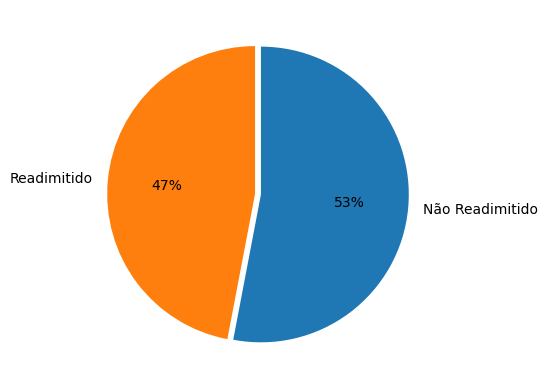

In [27]:
# Percentual de cada valor da variável 
percentual = round(df["readmitted"].value_counts() / len(df.index) * 100, 0)

# labels
labels = ["Não Readimitido", "Readimitido"]

# Gráfico
plt.axis("equal")
plt.pie(percentual ,
        labels = labels, 
        autopct = "%1.0f%%", 
        radius = 1, # size
        startangle = 90,
        explode = [0.02, 0.02],
        counterclock = False,
        pctdistance = 0.6)

plt.show()

<p>47% dos pacientes foram readimitidos em hospitais</p>

In [28]:
# Variável age
df["age"]

1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
5         [50-60)
           ...   
101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, Length: 98052, dtype: object

In [29]:
# Verificando quantos registros temos por faixa etária
df.groupby("age").size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25305
[80-90)     16702
[90-100)     2717
dtype: int64

Text(0, 0.5, 'Count')

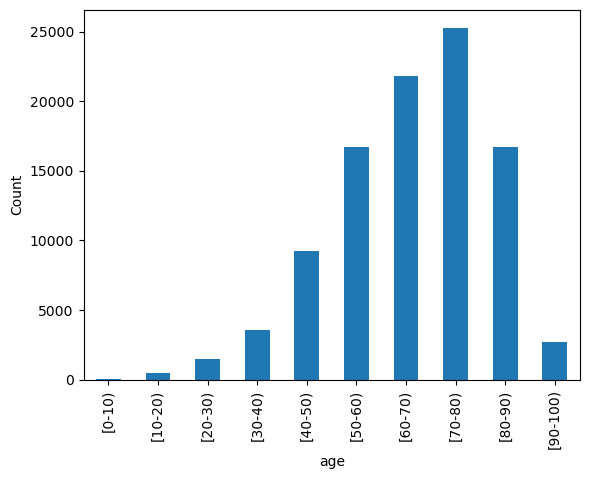

In [30]:
# Plot
df.groupby("age").size().plot(kind="bar")
plt.ylabel("Count")

<p>Podemos perceber que a maioria dos pacientes está na faixa etária entre (50-90) anos.</p>
<p>Temos duas alternativas para tomar uma decisão em relação a essa variável:</p>
<ul>
        <li> 1- Podemos assumir que a idade do paciente, em média, esteja no ponto médio de cada categoria. Por exemplo se o paciente tem entre (20-30) anos a média de idade seria 25.</li>
        <li> 2- Podemos recategorizar a variável, distribuindo os pacientes em faixas etárias menores e manter a variável como categórica. Dessa forma poderemos avaliar o risco por faixa etária e não por idade.</li>
</ul>

<p>Iremos adotar <b>opção 2</b>, pois a primeira opção iria modificar de forma gigantesca nosso conjunto de dados baseado em uma informação imprecisa.</p>

In [31]:
# Recategorizando a variável para a faixa etária entre 0-50
df["age"] = pd.Series(["[0-50]" if val in ["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)"] else val
                     for val in df["age"]], index = df.index)

# Recategorizando a variável para a faixa etária entre 80-100
df["age"] = pd.Series(["[80-100]" if val in ["[80-90)", "[90-100)"] else val
                      for val in df["age"]], index = df.index)

In [32]:
df["age"].value_counts()

[70-80)     25305
[60-70)     21809
[80-100]    19419
[50-60)     16697
[0-50]      14822
Name: age, dtype: int64

In [33]:
df["age"].dtypes

dtype('O')

Text(0, 0.5, 'Count')

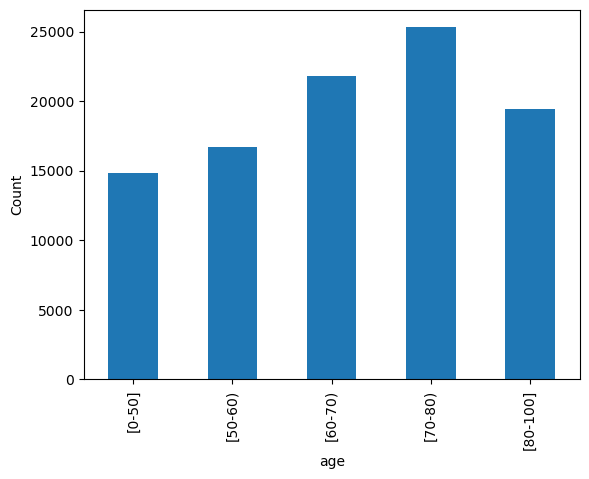

In [34]:
# Plot
df.groupby("age").size().plot(kind="bar")
plt.ylabel("Count")

In [35]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[0-50],1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[0-50],1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[0-50],1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[0-50],1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,1


<p>Vamos fazer a recategorização das variáveis do tipo ID, </p>

In [36]:
# Valores únicos da variável admission_type
df.admission_type_id.unique()

array([1, 2, 3, 6, 4, 5, 8, 7], dtype=int64)

In [37]:
df.admission_type_id.nunique()

8

<p>Temos 8 níveis diferentes na variável <i>admission_type_id</i>, porém vamos fazer a recatogorização e deixá-la com apenas dois níveis, <b>emergência</b> e <b>outro</b>.Pois para esse tipo de análise esse tipo de informação é mais relevante.</p>

In [38]:
# Recategorizando a variável "admission_type"
df["admission_type_id"] = pd.Series(["Emergência" if val == 1 else "Outro"
                                   for val in df["admission_type_id"]], index = df.index)

In [39]:
df.admission_type_id.unique()

array(['Emergência', 'Outro'], dtype=object)

<p>Variável <b>discharge_disposition_id</b>.</p>
<p>Essa variável contém <b>26 níveis</b>, reduziremos esses níveis para 2 sendo eles <b>casa</b> e <b>outro</b>.</p>

In [40]:
# Valores únicos
df.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [41]:
df.discharge_disposition_id.nunique()

26

In [42]:
# Recategorização da variável para dois valores: "casa" e "outro"
df["discharge_disposition_id"] = pd.Series(["Casa" if val == 1 else "Outro"
                                           for val in df["discharge_disposition_id"]], index = df.index)

In [43]:
df.discharge_disposition_id.unique()

array(['Casa', 'Outro'], dtype=object)

In [44]:
df.discharge_disposition_id.value_counts()

Casa     57609
Outro    40443
Name: discharge_disposition_id, dtype: int64

In [45]:
# Variável admission_source_id
df.admission_source_id.unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [46]:
df.admission_source_id.nunique()

17

In [47]:
# A variável admission_source_idtem 17 níveis
# Vamos reduzir para três níveis
df["admission_source_id"] = pd.Series(["Sala Emergência" if val == 7 else "Recomendação" if val == 1 else "Outro"
                                      for val in df["admission_source_id"]], index = df.index)


In [48]:
df["admission_source_id"].unique()

array(['Sala Emergência', 'Outro', 'Recomendação'], dtype=object)

In [49]:
df["admission_source_id"].value_counts()

Sala Emergência    55951
Recomendação       28355
Outro              13746
Name: admission_source_id, dtype: int64

<p>Como tratamos as variáveis <b>diag_1, diag_2, diag_3</b> que representam o diagnóstico médico?</p> 
<p>O conjunto de dados contém até três diagnósticos para determinado paciente(<i>primário, secundário, adicional</i>).</p>
<p>No entanto, cada diagnóstico é representado por um código ICD-9 e é extremamente difícil incuí-los no modelo e intepretar de forma eficaz.</p>
<p>Portanto reduziremos esses códigos para 4 categorias.</p>
<p><a href="https://pt.abcdef.wiki/wiki/List_of_ICD-9_codes#:~:text=Lista%20de%20c%C3%B3digos%20ICD-9%20-%20List%20of%20ICD-9,dos%20c%C3%B3digos%20CID-9%20290-319%3A%20transtornos%20mentais%20Mais%20itens">Códigos ICD-9</a> (International Classification of Diseases ou Código Internacional de Doenças):</p>

In [50]:
# Concatenando os diagnósticos em uma variável
diagnosticos = df[["diag_1", "diag_2", "diag_3"]]

In [51]:
diagnosticos.head()

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250


In [52]:
# Verificando se foi gerado algum valor nulo
diagnosticos.isnull().any()

diag_1    False
diag_2    False
diag_3    False
dtype: bool

In [53]:
# Importar o pacote "re" para expressões regulares
import re

In [54]:
# Função que calcula a Comorbidade
def calcula_comorbidade(row):
    
    # Código 250 indica diabetes
    codigos_doenca_diabetes = "^[2][5][0]"
    
    # Códigos 39x (x = valor entre 0 e 9)
    # Códigos 4zx (z = valor entre 0 e 6 e x = valor entre 0 e 9)
    # Esses códigos indicam problemas circulatórios
    codigos_doenca_circulatorios = "^[3][9][0-9]|^[4][0-5][0-9]"
    
    # Inicializa variável de retorno
    valor = 0
    
    # Valor 0 indica que:
    # Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 0
        
    # Valor 1 indica que:
    # Pelo menos um diagnóstico de diabetes e problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))): 
        valor = 1
        
    # Valor 2 indica que:
    # Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 2
        
    # Valor 3 indica que:
    # Pelo menos um diagnóstico de diabetes e pelo menos um diagnóstico de problemas circulatórios 
    # foram detectados de forma simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 3 
    
    return valor

In [55]:
%%time
df["comorbidade"] = diagnosticos.apply(calcula_comorbidade, axis = 1)

CPU times: total: 12.7 s
Wall time: 24.7 s


In [56]:
# Shape
df.shape

(98052, 45)

In [57]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50],Emergência,Casa,Sala Emergência,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergência,Casa,Sala Emergência,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50],Emergência,Casa,Sala Emergência,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50],Emergência,Casa,Sala Emergência,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


In [58]:
# Removendo as colunas diag_1, diag_2, diag_3
df.drop(columns=["diag_1",
                 "diag_2",
                 "diag_3"], axis = 1, inplace = True)

In [59]:
df.shape

(98052, 42)

In [60]:
# Contagem de valores
df.comorbidade.value_counts()

2    39551
0    22645
1    18192
3    17664
Name: comorbidade, dtype: int64

In [61]:
# Calculando em porcentagem de comorbidade em relação à variáve readmitted
percentage = pd.crosstab(df.comorbidade, df.readmitted, normalize = "index") * 100
percentage

readmitted,0,1
comorbidade,,
0,55.526606,44.473394
1,53.875330,46.124670
2,51.748376,48.251624
3,53.753397,46.246603


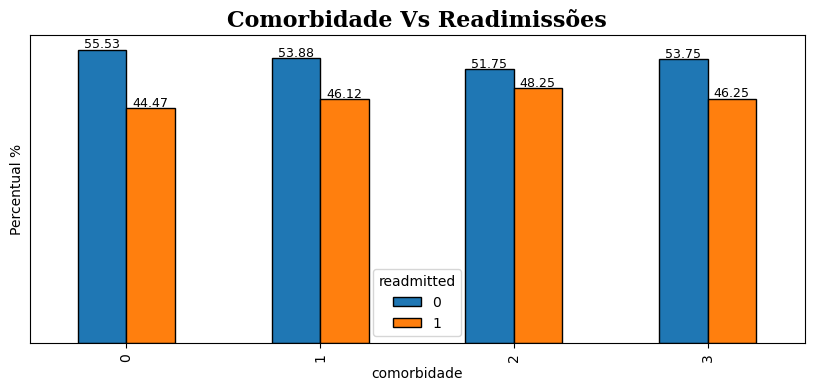

In [62]:
fig = percentage.plot(kind="bar",
                      figsize=(10, 4),
                      edgecolor="black",
                      ylabel = "Percentual %")

plt.yticks([])
plt.title("Comorbidade Vs Readimissões", fontdict={"font": "serif",
                                                   "fontsize": 16,
                                                   "weight": "bold"})
for i in fig.patches:
    fig.text(i.get_x() + 0.03,
            i.get_height() + 0.3,
            str(round((i.get_height()), 2)), 
            fontsize = 9,
            color = "black")
plt.show()

In [63]:
x = np.array(range(0, percentage.shape[1] + 2))
x

array([0, 1, 2, 3])

In [64]:
# Configurando melhor a qualidade do gráfico
%config InlineBackend.figure_format = "svg"

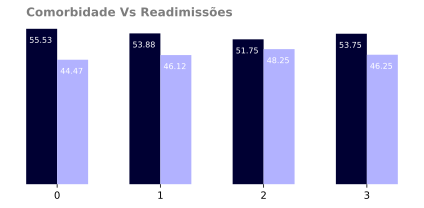

In [65]:
fig, ax = plt.subplots(figsize=(6, 3))

# largura da barra
width_bar = 0.30

# Criando barras individualmente
readmitido = ax.bar(x - width_bar/2, percentage[0], width_bar, color="#000033")
não_readmitido = ax.bar(x + width_bar/2, percentage[1], width_bar, color="#b2b2ff")

# Removendo as bordas do gráfico
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xticks([0, 1, 2, 3])

# Removendo o eixo Y
plt.gca().axes.get_yaxis().set_visible(False)

# Título
plt.text(x=-0.3,
         y=60,
         s="Comorbidade Vs Readimissões",
         fontsize=12,
         color="#262626",
         alpha=0.6,
         weight="bold")

for i in ax.patches:
    ax.text(i.get_x() + 0.03,
            i.get_height() - 5,
            str(round((i.get_height()), 2)), 
            fontsize = 8,
            color = "white")
    
fig.tight_layout()
plt.show()

In [66]:
percentage[0]

comorbidade
0    55.526606
1    53.875330
2    51.748376
3    53.753397
Name: 0, dtype: float64

<p>O conjunto de dados possui 23 recursos para 23 medicamentos, para cada um deles, se uma alteração foi feita durante a atual internação do paciente.</p>

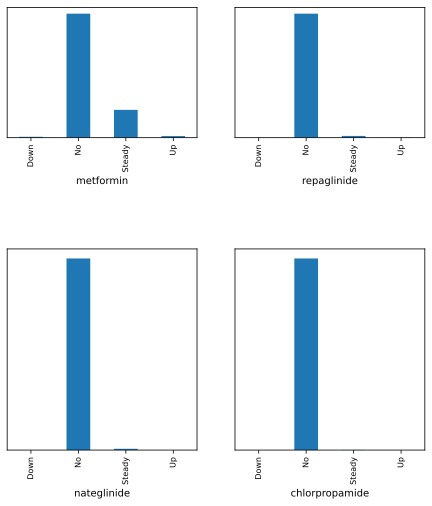

In [67]:
fig = plt.figure(figsize=(7.5, 8))

ax1 = fig.add_subplot(321)
ax1 = df.groupby(['metformin']).size().plot(kind="bar")
plt.xlabel('metformin')
plt.xticks(size=8)
plt.yticks([])

ax2 = fig.add_subplot(322)
ax2 = df.groupby('repaglinide').size().plot(kind="bar")
plt.xlabel('repaglinide')
plt.xticks(size=8)
plt.yticks([])

ax3 = fig.add_subplot(223)
ax3 = df.groupby('nateglinide').size().plot(kind="bar")
plt.xlabel('nateglinide')
plt.xticks(size=8)
plt.yticks([])

ax4 = fig.add_subplot(224)
ax4 = df.groupby('chlorpropamide').size().plot(kind="bar")
plt.xlabel('chlorpropamide')
plt.xticks(size=8)
plt.yticks([])

plt.show()

<p>Podemos contar quantas alterações cada paciente teve no total, e assim criar um novo atributo. Isso pode ajudar a descobrir uma relação entre o número de alterações, independentemente de qual medicamento foi utilizado.</p>
<p>Além disso podemos contar quantos medicamentos cada paciente consumiu durante seu período de internação. E então verificar se existe alguma relação com a readimissão.</p>

In [68]:
df.shape

(98052, 42)

In [69]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'comorbidade'],
      dtype='object')

In [70]:
# Cria uma lista de medicamentos
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [71]:
# size
len(medicamentos)

20

In [72]:
# Criando variáveis temporárias e atribuindo valores 
# 0 caso ela não sofreu alteração na dosagem
# 1 caso ela teve alterações
for col in medicamentos:
    if col in df.columns:
        colname = str(col) + "temp"
        df[colname] = df[col].apply(lambda x: 0 if(x == "No" or x == "Steady") else 1)

In [73]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazonetemp,acarbosetemp,miglitoltemp,troglitazonetemp,tolazamidetemp,insulintemp,glyburide-metformintemp,glipizide-metformintemp,glimepiride-pioglitazonetemp,metformin-pioglitazonetemp
1,149190,55629189,Caucasian,Female,[0-50],Emergência,Casa,Sala Emergência,3,59,...,0,0,0,0,0,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergência,Casa,Sala Emergência,2,11,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[0-50],Emergência,Casa,Sala Emergência,2,44,...,0,0,0,0,0,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[0-50],Emergência,Casa,Sala Emergência,1,51,...,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Criando uma variável com o nº de alterações
# Variável inicializada em 0 para evitar valores nulos no próximo passo
df["num_alt_dosagem_med"] = 0

In [75]:
# Atribuindo os valores na variável num_alt_dosagem_med
for col in medicamentos:
    if col in df.columns:
        colname = str(col) + "temp"
        df["num_alt_dosagem_med"] += df[colname]
        del df[colname]

In [76]:
# Contagem de alterações na dosagem dos pacientes
df["num_alt_dosagem_med"].value_counts()

0    71309
1    25350
2     1281
3      107
4        5
Name: num_alt_dosagem_med, dtype: int64

In [77]:
# Recoding das variáveis de medicamentos
for col in medicamentos:
    if col in df.columns:
        df[col] = df[col].replace("No", 0)
        df[col] = df[col].replace("Steady", 1)
        df[col] = df[col].replace("Up", 1)
        df[col] = df[col].replace("Down", 1)

In [78]:
# Criando a variável com o nº total de medicamentos por paciente
df["num_med"] = 0

In [79]:
# Atribuindo os valores das respectivas variáveis à variável "num_med"
for col in medicamentos:
    if col in df.columns:
        df["num_med"] += df[col]

In [80]:
# Contagem de medicamentos por paciente
df.num_med.value_counts()

1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: num_med, dtype: int64

In [81]:
df.shape

(98052, 44)

<p>Após criar as duas colunas, podemos remover as variáveis com os nomes dos medicamentos.</p>

In [82]:
# Removendo as variaveis 
df.drop(columns= medicamentos, inplace=True)

In [83]:
df.shape

(98052, 24)

In [84]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,Female,[0-50],Emergência,Casa,Sala Emergência,3,59,...,0,9,None,None,Ch,Yes,1,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergência,Casa,Sala Emergência,2,11,...,1,6,None,None,No,Yes,0,1,0,1
3,500364,82442376,Caucasian,Male,[0-50],Emergência,Casa,Sala Emergência,2,44,...,0,7,None,None,Ch,Yes,0,3,1,1
4,16680,42519267,Caucasian,Male,[0-50],Emergência,Casa,Sala Emergência,1,51,...,0,5,None,None,Ch,Yes,0,1,0,2
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,9,None,None,No,Yes,1,3,0,1


<h4>Recoding das Variáveis Categóricas</h4>


In [85]:
df["change"].value_counts()

No    52774
Ch    45278
Name: change, dtype: int64

In [86]:
df["gender"].value_counts()

Female    52833
Male      45219
Name: gender, dtype: int64

In [87]:
df["diabetesMed"].value_counts()

Yes    75350
No     22702
Name: diabetesMed, dtype: int64

In [88]:
# Recoding das variáveis categóricas
df["change"] = df["change"].replace("No", 0)
df["change"] = df["change"].replace("Ch", 1)
df["gender"] = df["gender"].replace("Female", 0)
df["gender"] = df["gender"].replace("Male", 1)
df["diabetesMed"] = df["diabetesMed"].replace("Yes", 1)
df["diabetesMed"] = df["diabetesMed"].replace("No", 0)

In [89]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50],Emergência,Casa,Sala Emergência,3,59,...,0,9,None,None,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50],Emergência,Casa,Sala Emergência,2,11,...,1,6,None,None,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50],Emergência,Casa,Sala Emergência,2,44,...,0,7,None,None,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50],Emergência,Casa,Sala Emergência,1,51,...,0,5,None,None,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,None,None,0,1,1,3,0,1


In [90]:
df.max_glu_serum.value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

<p>Também iremos reduzir os valores das variáveis A1Cresult e max_glum_serum onde os valores são None = -99, Norm = 0, >200, >300 = 1.</p> 

In [91]:
# Contagem de valores
df["max_glu_serum"].value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [92]:
# Contagem de valores
df["A1Cresult"].value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [93]:
# Recoding das variáveis
df["max_glu_serum"] = df["max_glu_serum"].replace("None", -99)
df["max_glu_serum"] = df["max_glu_serum"].replace("Norm", 0)
df["max_glu_serum"] = df["max_glu_serum"].replace(">200", 1)
df["max_glu_serum"] = df["max_glu_serum"].replace(">300", 1)
df["A1Cresult"] = df["A1Cresult"].replace("None", -99)
df["A1Cresult"] = df["A1Cresult"].replace("Norm", 0)
df["A1Cresult"] = df["A1Cresult"].replace(">8", 1)
df["A1Cresult"] = df["A1Cresult"].replace(">7", 1)

In [94]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50],Emergência,Casa,Sala Emergência,3,59,...,0,9,-99,-99,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50],Emergência,Casa,Sala Emergência,2,11,...,1,6,-99,-99,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50],Emergência,Casa,Sala Emergência,2,44,...,0,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50],Emergência,Casa,Sala Emergência,1,51,...,0,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


<p>Tivemos pacientes que participaram de mais de um encontro(consulta)</p>
<p>Não podemos contá-los como encontros independentes, pois isso afetaria o resultado de pacientes com vários encontros. Assim tentamos várias técnicas para recolher e consolidar vários encontros para o mesmo paciente, tais como:</p>
<ul>
    <li>Considerar a permanência média no hospital em vários encontros.</li>
    <li>Considerar a porcentagem de alterações na medicação em vários encontros.</li>
    <li>Considerar o número total de encontros para substituir o ID exclusivo dos encontros.</li>
    <li>Considerar a combinação de diagnósticos em vários encontros como uma lista.</li>
</ul>
<p>Por fim, o ideal foi deixar apenas um registro de encontro para cada paciente.</p>

In [95]:
# Removendo valores duplicados por ID de paciente mantendo o primeiro registro
df = df.drop_duplicates(subset=["patient_nbr"], keep = "first")

In [96]:
df.shape

(68629, 24)

In [97]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50],Emergência,Casa,Sala Emergência,3,59,...,0,9,-99,-99,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50],Emergência,Casa,Sala Emergência,2,11,...,1,6,-99,-99,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50],Emergência,Casa,Sala Emergência,2,44,...,0,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50],Emergência,Casa,Sala Emergência,1,51,...,0,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


In [98]:
# Salvando o conjunto de dados
df.to_csv("dados_médicos_pt1.csv", index = False)

<h1><b>Fim</b></h1>